# Website Performance Case Study

Bu proje, bir web sitesinin performansını analiz etmek için Python kullanarak çeşitli metrikleri değerlendirmeyi amaçlamaktadır. Analiz, işletmelerin stratejilerini optimize etmelerine ve daha verimli kararlar almalarına yardımcı olacaktır.

In [3]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler


In [4]:
df=pd.read_csv("data-export.csv")

In [5]:
df.sample(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2784,Unassigned,2024042117,2,2,0,0,0,1,0,2
921,Organic Social,2024042701,57,72,43,28.305555555555600,0.7543859649122810,5.25,0.5972222222222220,378
1976,Referral,2024050107,31,35,24,46,0.7741935483870970,5.4,0.6857142857142860,189
365,Organic Search,2024041611,75,83,52,50.855421686747000,0.6933333333333330,4.975903614457830,0.6265060240963860,413
2627,Organic Search,2024042305,12,15,6,25.733333333333300,0.5,4,0.4,60


In [6]:
df=pd.read_csv("data-export.csv",header=1)

In [7]:
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [8]:
df.shape

(3182, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Session primary channel group (Default channel group)  3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   int64  
 2   Users                                                  3182 non-null   int64  
 3   Sessions                                               3182 non-null   int64  
 4   Engaged sessions                                       3182 non-null   int64  
 5   Average engagement time per session                    3182 non-null   float64
 6   Engaged sessions per user                              3182 non-null   float64
 7   Events per session                                     3182 non-null   float64
 8   Engagement rate                                 

In [10]:
df.isnull().sum()

Session primary channel group (Default channel group)    0
Date + hour (YYYYMMDDHH)                                 0
Users                                                    0
Sessions                                                 0
Engaged sessions                                         0
Average engagement time per session                      0
Engaged sessions per user                                0
Events per session                                       0
Engagement rate                                          0
Event count                                              0
dtype: int64

In [11]:
df.describe(include='all')

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3.182000e+03,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.024043e+09,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
std,NaN,2.695099e+03,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313
min,NaN,2.024041e+09,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,NaN,2.024041e+09,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,NaN,2.024042e+09,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,NaN,2.024043e+09,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000


In [12]:
df['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(df['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')

In [13]:
grouped_data = df.groupby(df['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

In [14]:
# Sayısal Dönüşümler
numeric_cols = ['Users', 'Sessions', 'Engaged sessions', 'Average engagement time per session',
                'Engaged sessions per user', 'Events per session', 'Engagement rate', 'Event count']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Hata durumunda NaN yap

In [15]:
# Günün Saati, Haftanın Günü ve Ayı Bilgilerini Çıkar
df['Hour'] = df['Date + hour (YYYYMMDDHH)'].dt.hour
df['Day of Week'] = df['Date + hour (YYYYMMDDHH)'].dt.day_name()
df['Month'] = df['Date + hour (YYYYMMDDHH)'].dt.month

In [16]:
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)

In [17]:
df.sample(5)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour,Day of Week,Month,Is Weekend
1792,Organic Search,2024-04-11 10:00:00,36,48,24,53.083333,0.666667,3.395833,0.500000,163,10,Thursday,4,0
3133,Unassigned,2024-04-29 20:00:00,1,1,0,0.000000,0.000000,1.000000,0.000000,1,20,Monday,4,0
2746,Unassigned,2024-04-12 15:00:00,2,2,0,35.000000,0.000000,2.500000,0.000000,5,15,Friday,4,0
2993,Unassigned,2024-04-12 09:00:00,1,1,0,0.000000,0.000000,1.000000,0.000000,1,9,Friday,4,0
1895,Organic Social,2024-04-26 07:00:00,33,42,28,29.880952,0.848485,4.452381,0.666667,187,7,Friday,4,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Session primary channel group (Default channel group)  3182 non-null   object        
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   datetime64[ns]
 2   Users                                                  3182 non-null   int64         
 3   Sessions                                               3182 non-null   int64         
 4   Engaged sessions                                       3182 non-null   int64         
 5   Average engagement time per session                    3182 non-null   float64       
 6   Engaged sessions per user                              3182 non-null   float64       
 7   Events per session                                     3182 non-null 

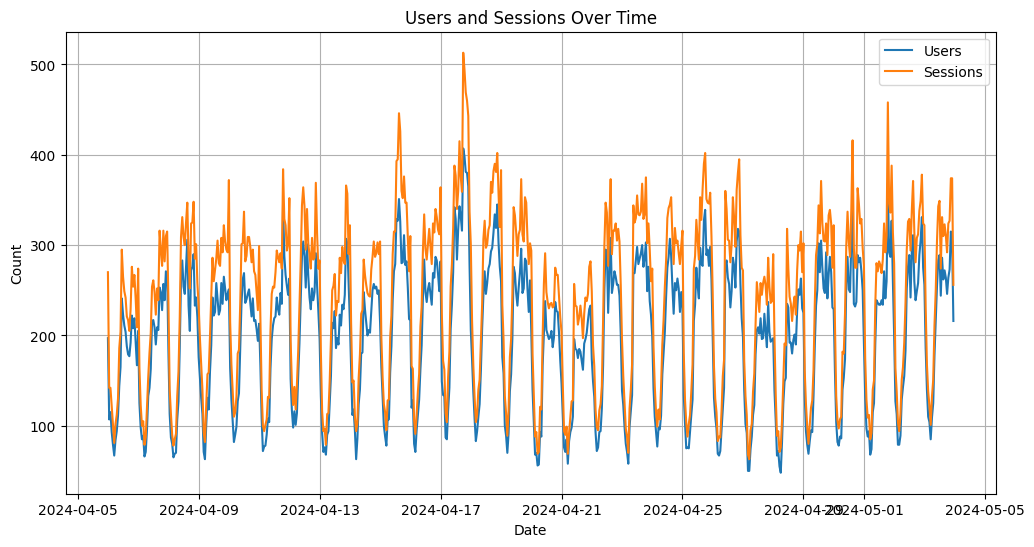

In [19]:
# Kullanıcı ve Oturum Eğilimleri
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Users and Sessions Over Time')
plt.legend()
plt.grid(True);

In [20]:
# Oturum Birincil Kanal Grubuna Göre Kullanıcı ve Oturum Analizi
channel_group_data = df.groupby('Session primary channel group (Default channel group)').agg({'Users': 'sum', 'Sessions': 'sum'})

<Figure size 1000x600 with 0 Axes>

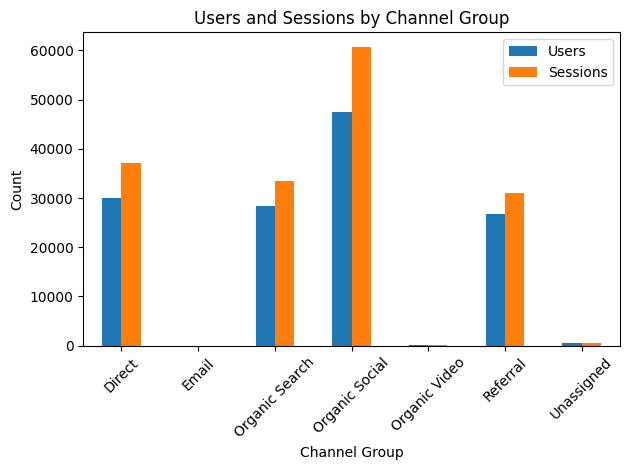

In [21]:
plt.figure(figsize=(10, 6))
channel_group_data.plot(kind='bar')
plt.title('Users and Sessions by Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

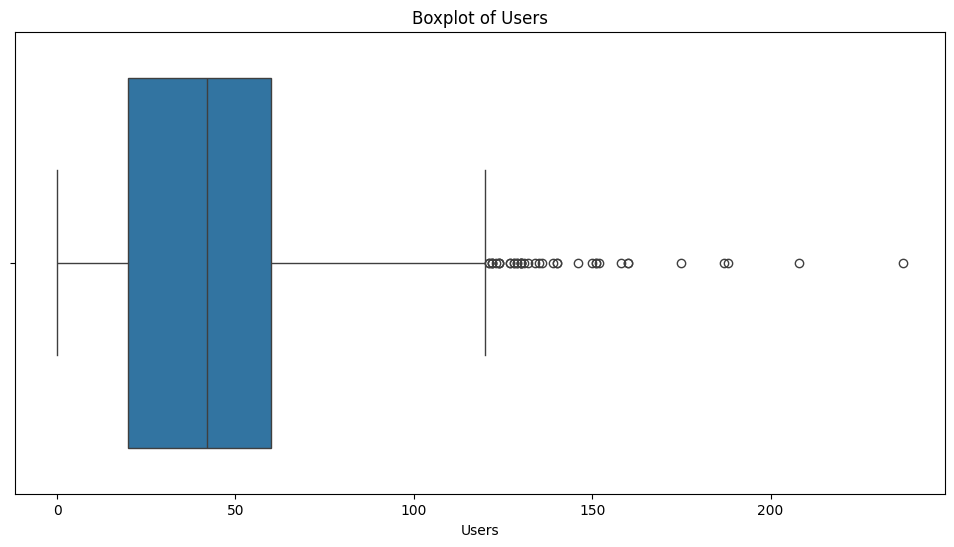

In [22]:
# Aykırı Değer Tespiti için Kutu Grafikleri
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Users'])
plt.title('Boxplot of Users')
plt.show()

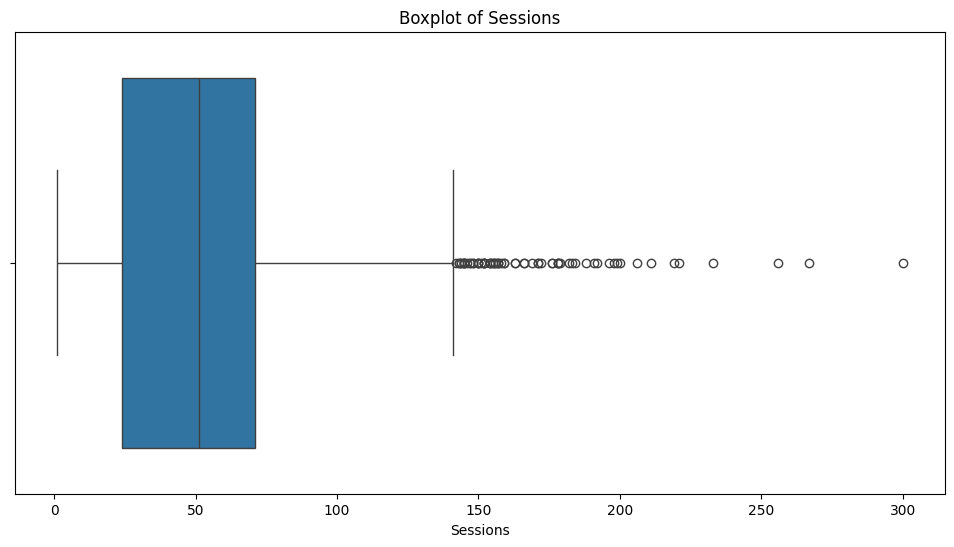

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Sessions'])
plt.title('Boxplot of Sessions')
plt.show()

In [24]:
# Etkileşim Oranı Analizi
engagement_rate_by_channel = df.groupby('Session primary channel group (Default channel group)')['Engagement rate'].mean()

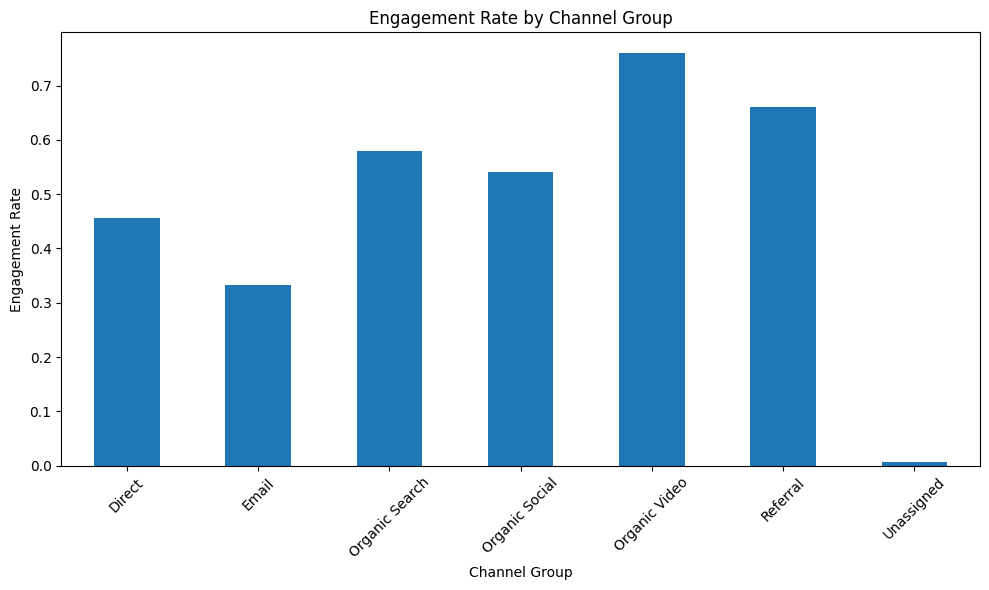

In [25]:
plt.figure(figsize=(10, 6))
engagement_rate_by_channel.plot(kind='bar')
plt.title('Engagement Rate by Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

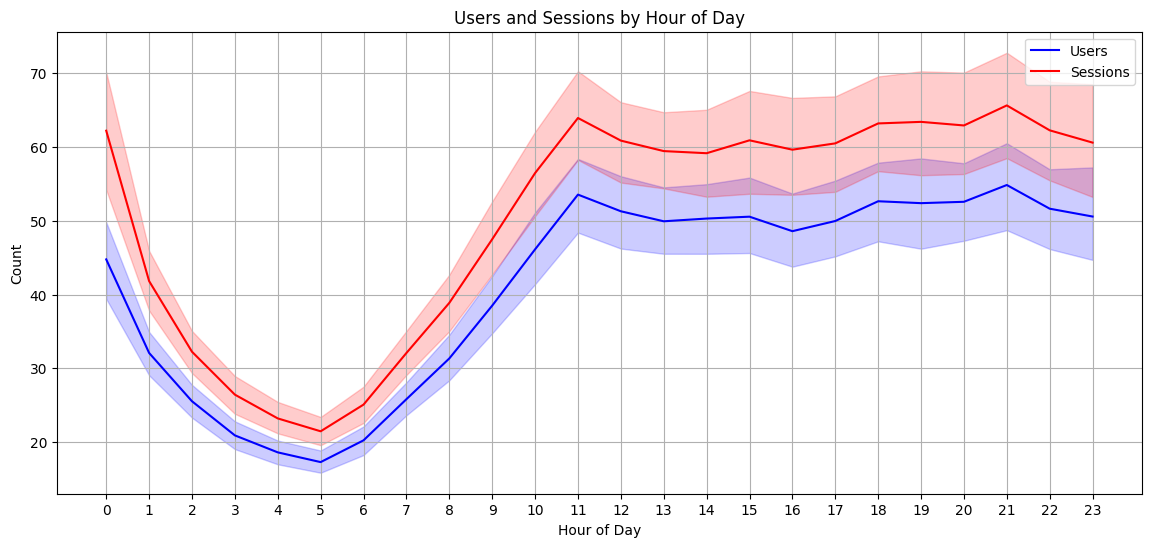

In [26]:
# 1. Günün Saatine Göre Kullanıcı ve Oturum Dağılımı
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Hour', y='Users', label='Users', color='blue')
sns.lineplot(data=df, x='Hour', y='Sessions', label='Sessions', color='red')
plt.title('Users and Sessions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

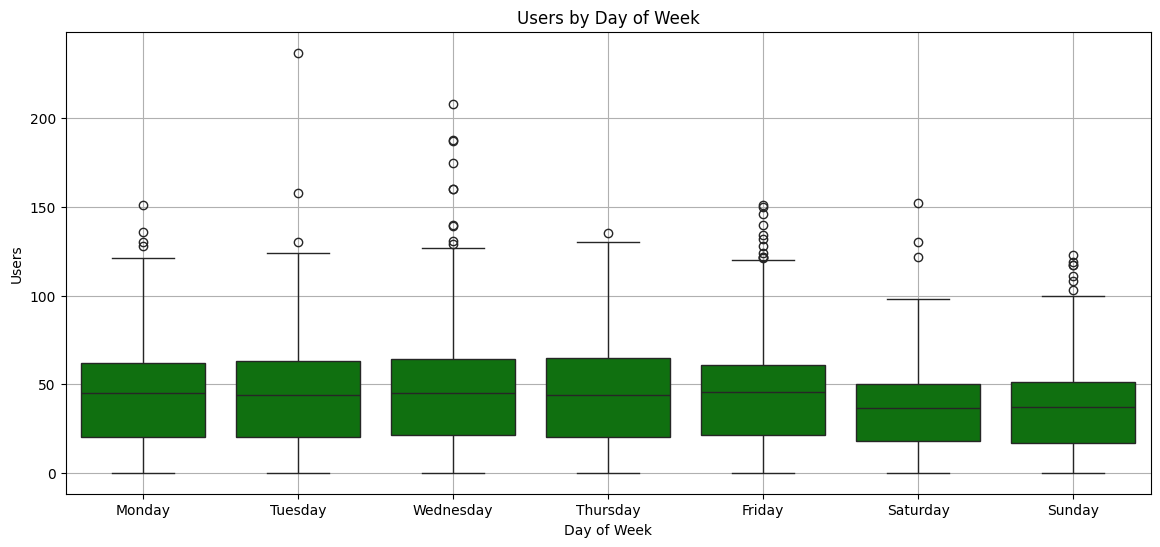

In [27]:
# 2. Haftanın Gününe Göre Kullanıcı ve Oturum Dağılımı
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Day of Week', y='Users', order=day_order, color='green')
plt.title('Users by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Users')
plt.grid(True)
plt.show()

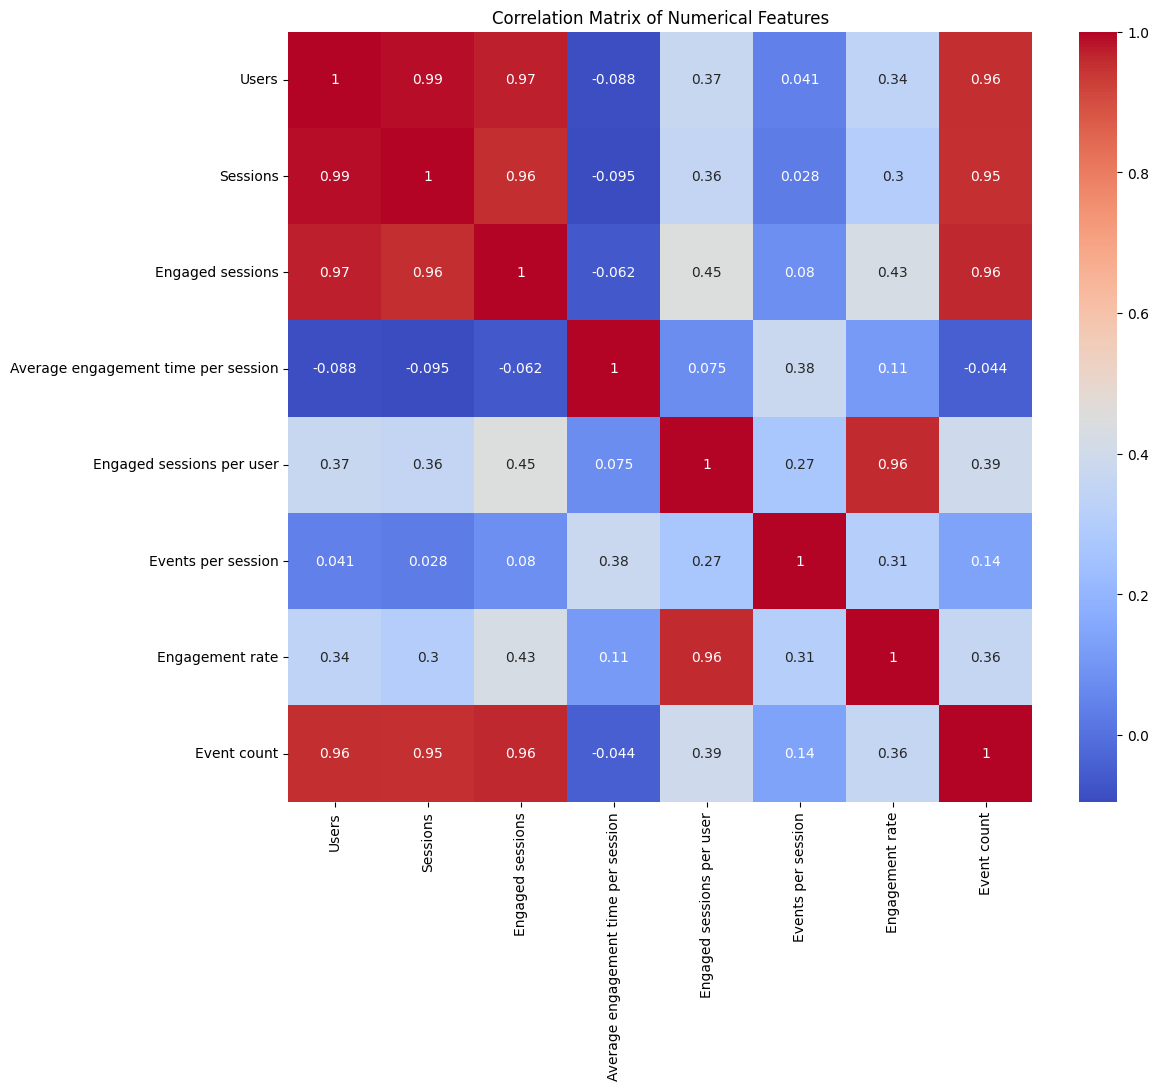

In [28]:
# 3. Isı Haritası ile Korelasyon Analizi
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

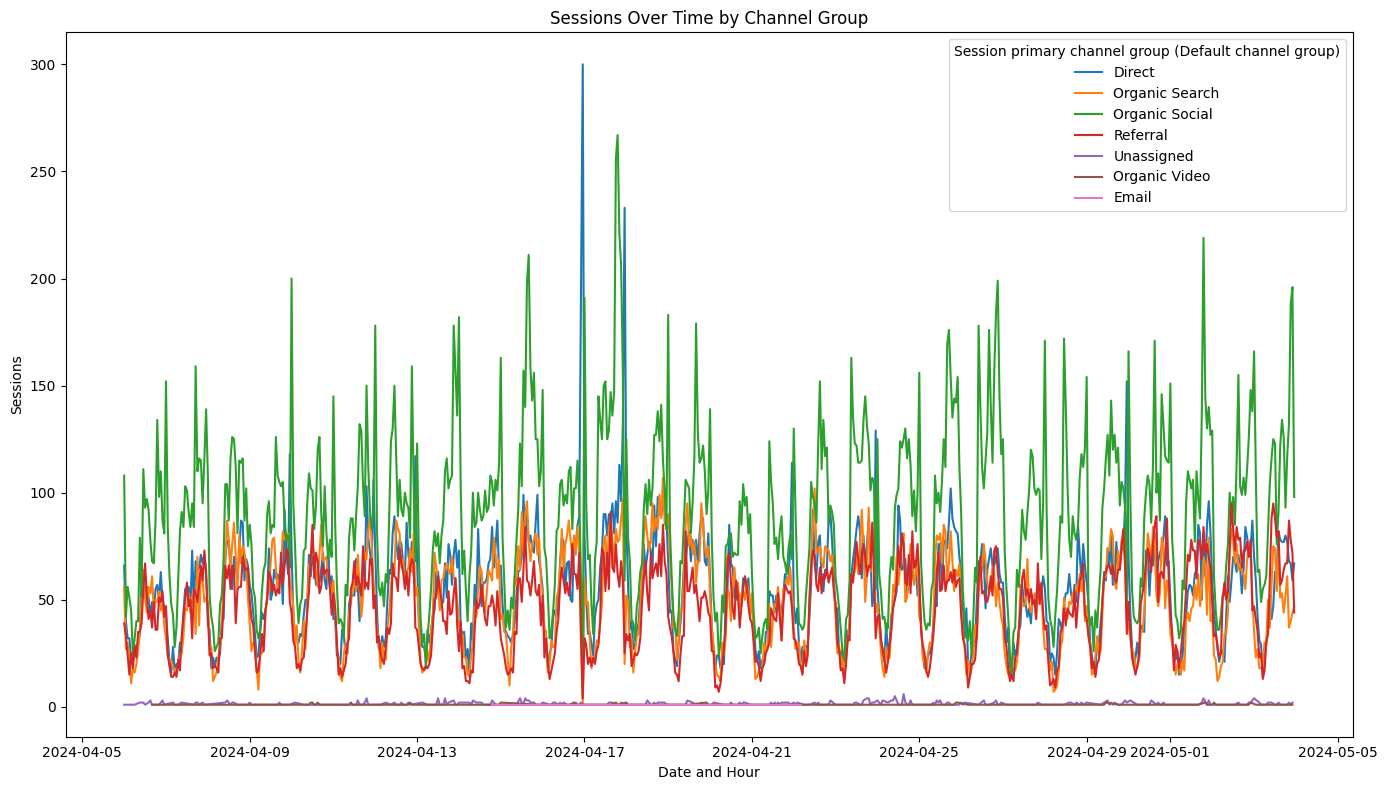

In [29]:
# Tarih ve Kanal Grubuna Göre Gruplandırma
df['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(df['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
grouped_data = df.groupby(['Date + hour (YYYYMMDDHH)', 'Session primary channel group (Default channel group)'])['Sessions'].sum().reset_index()

# Çizgi Grafik ile Görselleştirme
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Date + hour (YYYYMMDDHH)', y='Sessions', hue='Session primary channel group (Default channel group)')
plt.title('Sessions Over Time by Channel Group')
plt.ylabel('Sessions')
plt.xlabel('Date and Hour')
plt.tight_layout()
plt.show()


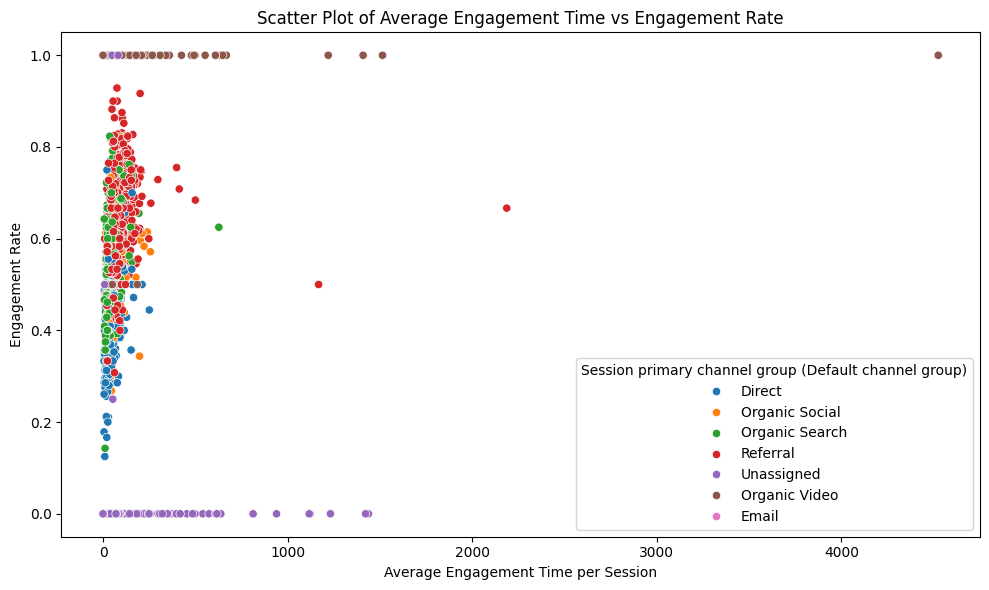

In [30]:
# Saçılım Grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average engagement time per session', y='Engagement rate', hue='Session primary channel group (Default channel group)')
plt.title('Scatter Plot of Average Engagement Time vs Engagement Rate')
plt.ylabel('Engagement Rate')
plt.xlabel('Average Engagement Time per Session')
plt.tight_layout()
plt.show()


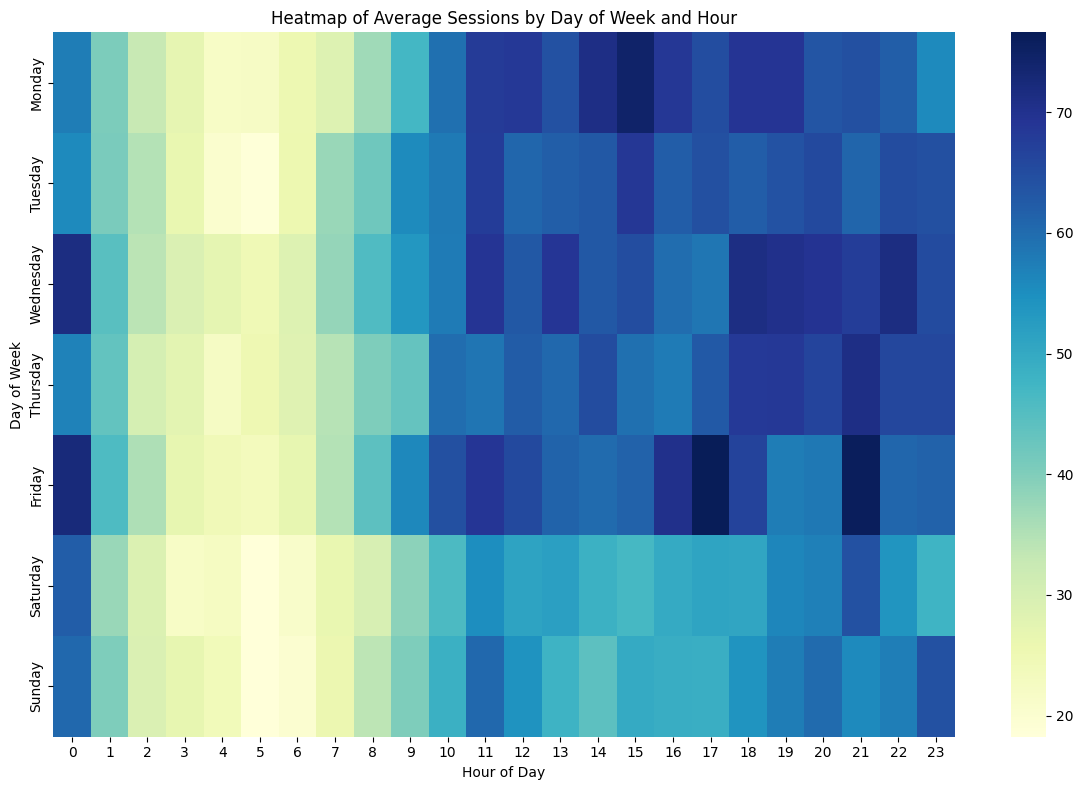

In [31]:
# Haftanın Günü ve Saatine Göre Veri Hazırlama
pivot_data = df.pivot_table(index='Day of Week', columns='Hour', values='Sessions', aggfunc='mean')
pivot_data = pivot_data.reindex(day_order)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu')
plt.title('Heatmap of Average Sessions by Day of Week and Hour')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.tight_layout()
plt.show()

Bu analiz, web sitesi performansını ve kullanıcı etkileşimini anlamak için yapılmıştır. Organik sosyal medya, en yüksek kullanıcı ve oturum sayılarına sahip kanal olarak öne çıkmaktadır. Belirli saatlerde ve günlerde trafik yoğunlaşırken, yüksek etkileşim süresi olan kullanıcıların etkileşim oranları da daha yüksektir. Isı haritaları, trafiğin yoğun olduğu zaman dilimlerini belirlemeye yardımcı olmuştur. Sonuçlar, kanal performansının optimize edilmesi, içerik stratejilerinin geliştirilmesi ve kullanıcı deneyiminin iyileştirilmesi yoluyla web sitesi performansının artırılabileceğini göstermektedir.